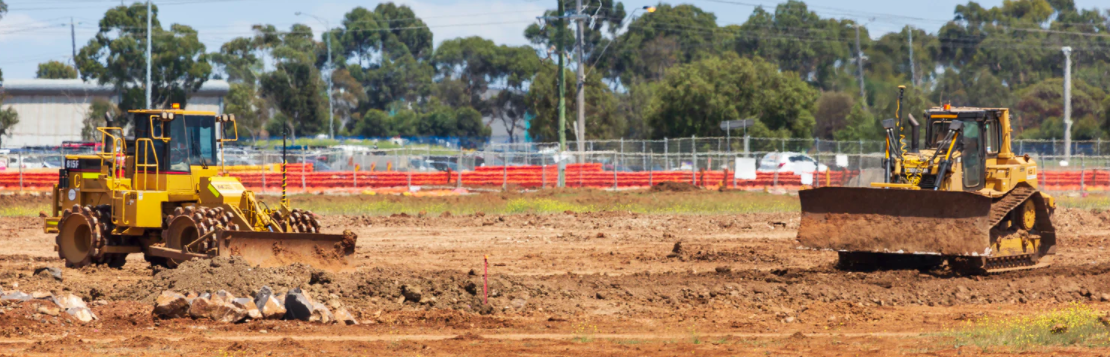

# Bulldozer Price Regression📈

This notebook is about predicting future sale price of bulldozers.

## 1. Problem Definition
> Predict future sale price of bulldozers, using the previous examples of the sale price of the similar bulldozer.

## 2. Data

Three main datasets have been provided from [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data):

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

## 3. Evaluation

According to the evalution definition in [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation):
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


## 4. Features

**Data Dictionary**

In [34]:
# Import library to view file
import pandas as pd

dd = pd.read_csv("data/Data Dictionary.csv")
dd

,Variable,Description
0,SalesID,unique identifier of a particular sale of a ...
1,MachineID,identifier for a particular machine; machin...
2,ModelID,identifier for a unique machine model (i.e. ...
3,datasource,source of the sale record; some sources are...
4,auctioneerID,"identifier of a particular auctioneer, i.e. ..."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...
7,UsageBand,"value (low, medium, high) calculated compari..."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


### Preparation of Tools

In [35]:
# Import Libraries for Data Analysis and Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Load Data

In [36]:
# Import data
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False)

### Data Exploration (Exploratory Data Analysis or EDA)

In [37]:
# Overview of Dataframe
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [38]:
# Check info of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [39]:
# Check for null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

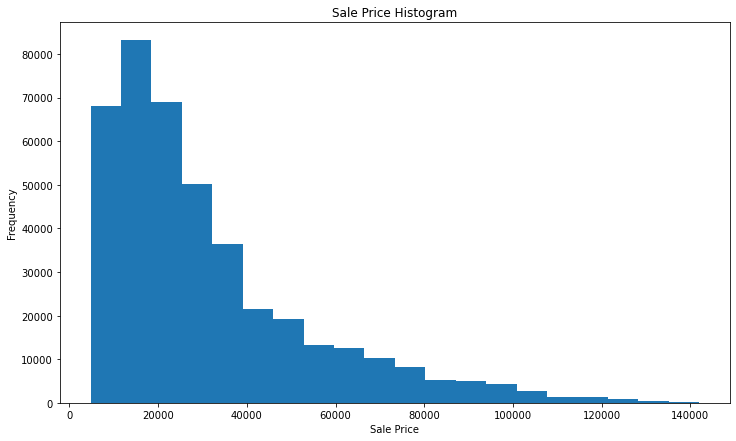

In [40]:
# Sale Price Histogram
plt.figure(figsize=(12, 7))
df.SalePrice.plot.hist(bins=20)
plt.title("Sale Price Histogram")
plt.xlabel("Sale Price");

A large portion of sale price is within the price of 20,000.00.

### Date Parsing

The `saledate` shows as an `Object` datatype which is equivalent to a `string` or word. Parsing the `saledate` to be a `datetime` datatype is necessary.

In [41]:
# Parse Dates
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False,
                parse_dates=['saledate'])

In [42]:
# Check saledate datatype for verification
df['saledate'][:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

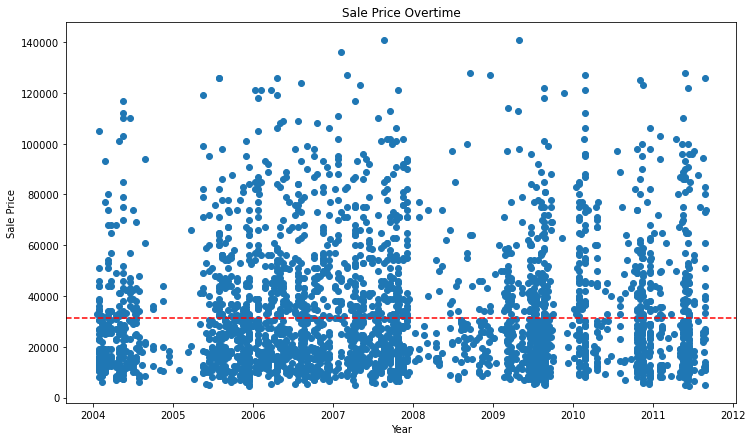

In [43]:
# Visualize Saledate vs SalePrice
fig, ax = plt.subplots(figsize=(12, 7))

# Plot
ax.scatter(df['saledate'][:3000],
           df['SalePrice'][:3000])

# Customize
ax.set(title="Sale Price Overtime",
      xlabel="Year",
      ylabel="Sale Price")

# Mean
ax.axhline(df['SalePrice'].mean(),
          linestyle="--",
          c="red");

**2005**
>Consumer spending slowed abruptly as purchases of motor vehicles collapsed after automakers phased out the generous incentive programs that had lifted sales through the summer. As consumers cut back on spending, business investment also slowed as companies curtailed spending on cars and trucks. Military spending also fell unexpectedly, while a surging import bill put a drag on overall growth. 
Source: [NYTimes](https://www.nytimes.com/2006/01/28/business/us-economy-slowed-sharply-at-end-of-2005.html)

**2008**
>In the early months of 2008, many observers believed that a U.S. recession had begun. The collapse of Bear Stearns and the resulting financial market turbulence signaled that the crisis would not be mild and brief. 
Source: [Wikipedia](https://en.wikipedia.org/wiki/Great_Recession_in_the_United_States)

In [44]:
# Check Sale Count per State
df['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Modify Dataframe

In [45]:
# Create a duplicate of the DataFrame
df_dup = df.copy()

In [46]:
# Sort dates
df_dup.sort_values(by=['saledate'],
                           inplace=True,
                           ascending=True)
df_dup.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Feature Engineering

Break down `saledate` into different parts. 

#### Preprocess Data

In [47]:
# Preprocessing Date Function
def preprocess_date(df):
    """
    Breakdown sale date
    """
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear
    
    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    return df

In [48]:
df_dup = preprocess_date(df_dup)

In [49]:
# Check created columns
df_dup[['saleYear', 'saleMonth', 'saleDay', 'saleDayofweek', 'saleDayofyear']]

,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1989,1,17,1,17
274835,1989,1,31,1,31
141296,1989,1,31,1,31
212552,1989,1,31,1,31
62755,1989,1,31,1,31
...,...,...,...,...,...
410879,2012,4,28,5,119
412476,2012,4,28,5,119
411927,2012,4,28,5,119
407124,2012,4,28,5,119


## 5. Modelling

### Convertion of Strings to Categories

In [50]:
# Review dataframe
df_dup.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [51]:
# Create a loop to convert each string column
# Use pandas to convert strings into categories
# Assigning category values to strings
for label, content in df_dup.items():
    if pd.api.types.is_string_dtype(content):
        df_dup[label] = content.astype('category').cat.as_ordered()

In [52]:
# Check if conversion succeded
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [53]:
# Visual value
df_dup[['ProductSize']].head()

,ProductSize
205615,Medium
274835,NaN
141296,Large
212552,NaN
62755,NaN


In [54]:
# Check if category code is working
df_dup['ProductSize'].cat.codes

205615    3
274835   -1
141296    1
212552   -1
62755    -1
         ..
410879   -1
412476   -1
411927    4
407124   -1
409203   -1
Length: 412698, dtype: int8

### Splitting Data | Training and Validation Sets

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

In [55]:
df_dup["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [56]:
df_dup.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [57]:
# Split Data
# Validation & Train Set
df_val = df_dup[df_dup['saleYear'] == 2012]
df_train = df_dup[df_dup['saleYear'] != 2012]

In [58]:
df_dup.shape, df_train.shape, df_val.shape

((412698, 57), (401125, 57), (11573, 57))

### Fill Missing Values

Filling missing values should be done after splitting the data in our model to prevent the influence of future data to past data.

#### Preprocessing Function for Training and Validation Set

In [59]:
# Preprocessing Function for Training and Validation Set
def preprocess_data(df):
    """
    Transforms df
    """
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

**Filling and Converting Categorical Variables to Numbers (Training)**

In [60]:
# Check for string columns
for label, content in df_train.items():
    # NOT numeric
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [61]:
# Fill missing values with median
df_train = preprocess_data(df_train)

<ipython-input-59-23c13efc7578>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label+"_is_missing"] = pd.isnull(content)
<ipython-input-59-23c13efc7578>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = content.fillna(content.median())
<ipython-input-59-23c13efc7578>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [62]:
# Check for missing values
df_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [63]:
# Columns was unequal when data is split, drop column that does not match.
df_train.drop("auctioneerID_is_missing", axis=1, inplace=True)

/Users/nikkoroque/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Filling and Converting Categorical Variables to Numbers (Validation)**

In [64]:
# Check for string columns
for label, content in df_val.items():
    # NOT numeric
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [65]:
# Fill missing values with median
df_val = preprocess_data(df_val)

<ipython-input-59-23c13efc7578>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label+"_is_missing"] = pd.isnull(content)
<ipython-input-59-23c13efc7578>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = content.fillna(content.median())
<ipython-input-59-23c13efc7578>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [66]:
# Check for missing values
df_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

### Evaluation Function

>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


In [67]:
# Create an evaluation function
# Import ML Library
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions 
    and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def display_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [68]:
# Split Data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

# Check shape
c_shapes = [X_train, y_train, X_valid, y_valid]

# Loop through each one to check shape
for i in c_shapes:
    print(i.shape)

(401125, 101)
(401125,)
(11573, 101)
(11573,)


In [69]:
X_train.shape, y_train.shape

((401125, 101), (401125,))

### Import Machine Learning Model

In [70]:
# Import ML Library
from sklearn.ensemble import RandomForestRegressor
import time

In [71]:
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=9,
                              max_samples=10000)

In [72]:
%%time

# Cut down the max number of samples each tree can see
model.fit(X_train, y_train)

CPU times: user 35 s, sys: 699 ms, total: 35.7 s
Wall time: 7.08 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=9)

In [73]:
# Baseline Model
display_score(model)

{'Training MAE': 5558.372275574945,
 'Valid MAE': 7197.857665255335,
 'Training RMSLE': 0.2575848104792349,
 'Valid RMSLE': 0.2953764425806592,
 'Training R^2': 0.8606667749834621,
 'Valid R^2': 0.8327463010873368}

### Hyperparameter Tuning with RandomizedSearchCV

In [74]:
%%time

# Import Libary
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassifier Hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate model
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter=20,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.1min finished


CPU times: user 6min 36s, sys: 36.2 s, total: 7min 12s
Wall time: 7min 15s


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [75]:
# Check best parameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [76]:
# Evaluate Score
display_score(rs_model)

{'Training MAE': 6071.39311089949,
 'Valid MAE': 7628.965123057337,
 'Training RMSLE': 0.27612883927371806,
 'Valid RMSLE': 0.30685342695812723,
 'Training R^2': 0.8323652361152021,
 'Valid R^2': 0.8035356083320877}

In [77]:
# Baseline model
display_score(model)

{'Training MAE': 5558.372275574945,
 'Valid MAE': 7197.857665255335,
 'Training RMSLE': 0.2575848104792349,
 'Valid RMSLE': 0.2953764425806592,
 'Training R^2': 0.8606667749834621,
 'Valid R^2': 0.8327463010873368}

### Train model with best parameters

In [83]:
%%time
# Best params model
bp_model = RandomForestRegressor(n_estimators = 50,
                                 min_samples_split = 2,
                                 min_samples_leaf = 9,
                                 max_samples = 10000,
                                 max_features = 'auto',
                                 max_depth = None,
                                random_state=9)

# Fitting
bp_model.fit(X_train, y_train)

CPU times: user 8.75 s, sys: 387 ms, total: 9.14 s
Wall time: 9.17 s


RandomForestRegressor(max_samples=10000, min_samples_leaf=9, n_estimators=50,
                      random_state=9)

In [84]:
# bp_model
display_score(bp_model)

{'Training MAE': 6063.468038038495,
 'Valid MAE': 7677.657404185618,
 'Training RMSLE': 0.27591751691578953,
 'Valid RMSLE': 0.3091948980112594,
 'Training R^2': 0.8327800344323717,
 'Valid R^2': 0.8015295849372954}

In [85]:
# rs_model
display_score(rs_model)

{'Training MAE': 6071.39311089949,
 'Valid MAE': 7628.965123057337,
 'Training RMSLE': 0.27612883927371806,
 'Valid RMSLE': 0.30685342695812723,
 'Training R^2': 0.8323652361152021,
 'Valid R^2': 0.8035356083320877}

In [87]:
# baseline mode
display_score(model)

{'Training MAE': 5558.372275574945,
 'Valid MAE': 7197.857665255335,
 'Training RMSLE': 0.2575848104792349,
 'Valid RMSLE': 0.2953764425806592,
 'Training R^2': 0.8606667749834621,
 'Valid R^2': 0.8327463010873368}

RMSLE result with best parameters on validation set is .302788446.

### Test Data Predictions

In [94]:
# Import test data
df_test = pd.read_csv("data/Test.csv", parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [95]:
# Run dataframe through preprocessing functions
df_test = preprocess_date(df_test)
df_test = preprocess_data(df_test)

In [97]:
# Check Dataframe
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [91]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [98]:
# Make predictions df_test
test_preds = bp_model.predict(df_test)

In [99]:
test_preds

array([19236.05809507, 24447.26986021, 52633.75384648, ...,
       12393.48777799, 16437.11219891, 22627.65401833])

In [100]:
# Create DataFrame 
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19236.058095
1,1227844,24447.269860
2,1227847,52633.753846
3,1227848,81635.745114
4,1227863,40017.773591
...,...,...
12452,6643171,43013.343489
12453,6643173,12271.243675
12454,6643184,12393.487778
12455,6643186,16437.112199


## Feature Importance

Seeks to figure out which different attributes of the data were most impotant when it comes to predicting the target variable.

In [101]:
# Find feature importance of best model
bp_model.feature_importances_

array([4.34031376e-02, 1.27925410e-02, 2.28074755e-02, 3.24884314e-04,
       1.90423360e-03, 2.87677464e-01, 2.06755366e-03, 4.70128952e-04,
       1.80783742e-02, 5.01947273e-02, 5.71556348e-02, 3.18888381e-03,
       2.62920758e-03, 2.50013578e-01, 3.37607177e-02, 3.97038787e-03,
       6.76341850e-04, 9.87737246e-04, 1.45606390e-03, 2.84255849e-02,
       1.29763388e-04, 1.03794641e-05, 8.89843307e-04, 1.82724229e-04,
       5.61881899e-04, 2.64388251e-06, 2.63264565e-05, 2.65298978e-02,
       4.84373223e-04, 1.80956408e-03, 4.06967807e-03, 9.34040234e-04,
       2.03485377e-03, 1.42216285e-03, 1.93479354e-03, 2.46377089e-03,
       5.41402021e-04, 2.10212883e-02, 6.33747407e-04, 0.00000000e+00,
       1.58398720e-04, 7.58496011e-04, 7.79386680e-04, 4.37110661e-04,
       1.92118779e-04, 2.20825750e-04, 1.14790236e-05, 1.41600390e-03,
       6.44685759e-04, 1.62266824e-04, 1.83812820e-04, 6.40186208e-02,
       9.82518132e-04, 3.67395595e-03, 1.58077584e-03, 6.29239971e-03,
      

In [102]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot Data
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

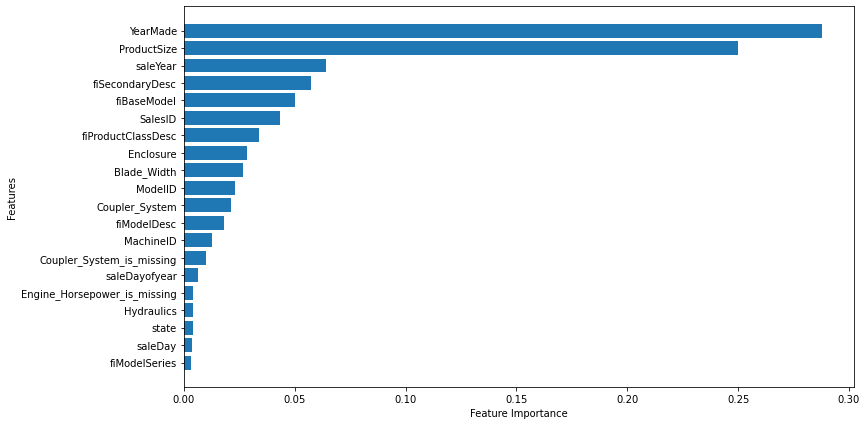

In [103]:
plot_features(X_train.columns, bp_model.feature_importances_)